In [1]:
from tools import read_merged_data
import warnings # python 🐍🐍🐍🐍🐍
warnings.filterwarnings("ignore")
random_state = 42

In [2]:
data = read_merged_data(n=124)

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

In [3]:
import pandas as pd
import numpy as np
np.random.seed(random_state)

def generate_sample(day, day_index, rnd, sizings, sample_index, sampling_rate) -> pd.DataFrame:
    train_start_time = day.index[rnd] # when referencing start <= segment < end
    train_end_time = day.index[rnd + sizings[0]]
    test_end_time1 = day.index[rnd + sizings[1]]
    test_end_time2 = day.index[rnd + sizings[2]]
    test_end_time3 = day.index[rnd + sizings[3]]
    row = {"sample_index": sample_index,
           "train_size (s)": sizings[0],
           "day_index": day_index,
           "train_start_time": train_start_time,
           "train_end_time": train_end_time,
           "test_end_time1": test_end_time1,
           "test_end_time2": test_end_time2,
           "test_end_time3": test_end_time3,
           "sampling_rate (s)": sampling_rate}
    row = pd.DataFrame([row])
    return row

# extract intra day segments
# train/test size

sample_index = 0
indicies = pd.DataFrame()
for i, d in enumerate(data):
    N = len(d)
    # random samples (3 each)

    for _ in range(20):
        # 1 min / 1s,10s,20s - (60,61,70,80)
        sizings = (60,61,70,80)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 1)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

        # 12 min / 12s,2min,4min
        sizings = (12*60, 12*60+12, 14*60, 16*60)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 1)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

        # 60 min / 1min,10min,20min
        sizings = (60*60, 61*60, 70*60, 80*60)
        row = generate_sample(d, i, np.random.randint(0,N - sizings[3]), sizings, sample_index, 2)
        indicies = pd.concat([indicies, row], axis = 0)
        sample_index += 1

    # fixed samples
    # 3hr / 3min,30min,1hr
    # start_times = (8:00, 10:15, 12:30)
    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 0, sizings, sample_index, 5) # 8:00
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 15*60*9, sizings, sample_index, 5) # 10:15
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

    sizings = (60*60*3, 60*60*3 + 3*60, 60*60*3 + 30*60, 60*60*4)
    row = generate_sample(d, i, 30*60*9 - 1, sizings, sample_index, 5) # 12:30
    indicies = pd.concat([indicies, row], axis = 0)
    sample_index += 1

indicies.index = indicies["sample_index"]
indicies.drop("sample_index", axis = 1, inplace=True)
indicies

,train_size (s),day_index,train_start_time,train_end_time,test_end_time1,test_end_time2,test_end_time3,sampling_rate (s)
sample_index,,,,,,,,
0,60,0,2025-01-02 14:34:14,2025-01-02 14:35:14,2025-01-02 14:35:15,2025-01-02 14:35:24,2025-01-02 14:35:34,1
1,720,0,2025-01-02 12:23:15,2025-01-02 12:35:15,2025-01-02 12:35:27,2025-01-02 12:37:15,2025-01-02 12:39:15,1
2,3600,0,2025-01-02 08:14:20,2025-01-02 09:14:20,2025-01-02 09:15:20,2025-01-02 09:24:20,2025-01-02 09:34:20,2
3,60,0,2025-01-02 09:29:50,2025-01-02 09:30:50,2025-01-02 09:30:51,2025-01-02 09:31:00,2025-01-02 09:31:10,1
4,720,0,2025-01-02 13:59:35,2025-01-02 14:11:35,2025-01-02 14:11:47,2025-01-02 14:13:35,2025-01-02 14:15:35,1
...,...,...,...,...,...,...,...,...
7870,720,124,2025-07-01 10:45:27,2025-07-01 10:57:27,2025-07-01 10:57:39,2025-07-01 10:59:27,2025-07-01 11:01:27,1
7871,3600,124,2025-07-01 11:18:47,2025-07-01 12:18:47,2025-07-01 12:19:47,2025-07-01 12:28:47,2025-07-01 12:38:47,2
7872,10800,124,2025-07-01 08:00:00,2025-07-01 11:00:00,2025-07-01 11:03:00,2025-07-01 11:30:00,2025-07-01 12:00:00,5


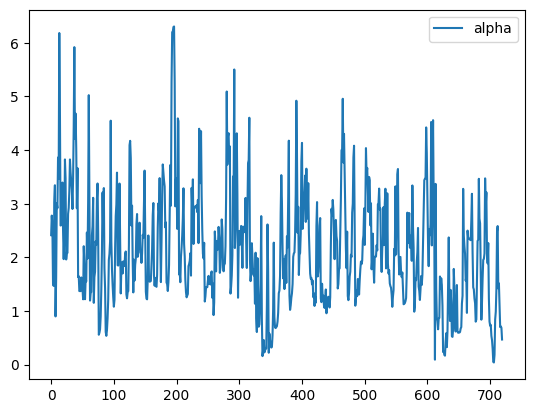

In [53]:
# convert indicies to samples
import matplotlib.pyplot as plt

def extract_sample(train_size, indices, data, x_features, y_feature):

    assert len(x_features) > 0
    assert isinstance(y_feature, str)

    inds = indices[indices["train_size (s)"] == train_size]
    X = []
    y1 = []
    y2 = []
    y3 = []

    for i, row in inds.iterrows():
        df = data[row["day_index"]]
        X.append(df[(df.index >= row["train_start_time"]) & (df.index < row["train_end_time"])][x_features].values)
        y1.append(df[(df.index == row["test_end_time1"])][y_feature].values)
        y2.append(df[(df.index == row["test_end_time2"])][y_feature].values)
        y3.append(df[(df.index == row["test_end_time3"])][y_feature].values)

    return np.array(X), np.array(y1), np.array(y2), np.array(y3)

x_features = ["alpha", "beta", "mid_price", "low_ask", "high_bid", "Volume", "Last Tapes Price"]
y_feature = "Last Tapes Price"

X, *ys = extract_sample(720, indicies, data, x_features, y_feature)

plt.plot(X[0][:,0], label = x_features[0])
plt.legend()

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, ys[0], test_size=0.2, random_state=random_state)

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Similarly, reshape X_test
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Now train the model
clf = DecisionTreeRegressor(max_leaf_nodes=20)
clf.fit(X_train_reshaped, y_train)
 
# Predict the target values for the test set
y_pred = clf.predict(X_test_reshaped)

# Calculate mean absolute error
acc1 = mean_absolute_error(y_test, y_pred)
print("Linear Regression model accuracy (in MAE):", acc1)

Linear Regression model accuracy (in MAE): 6.674614978895928


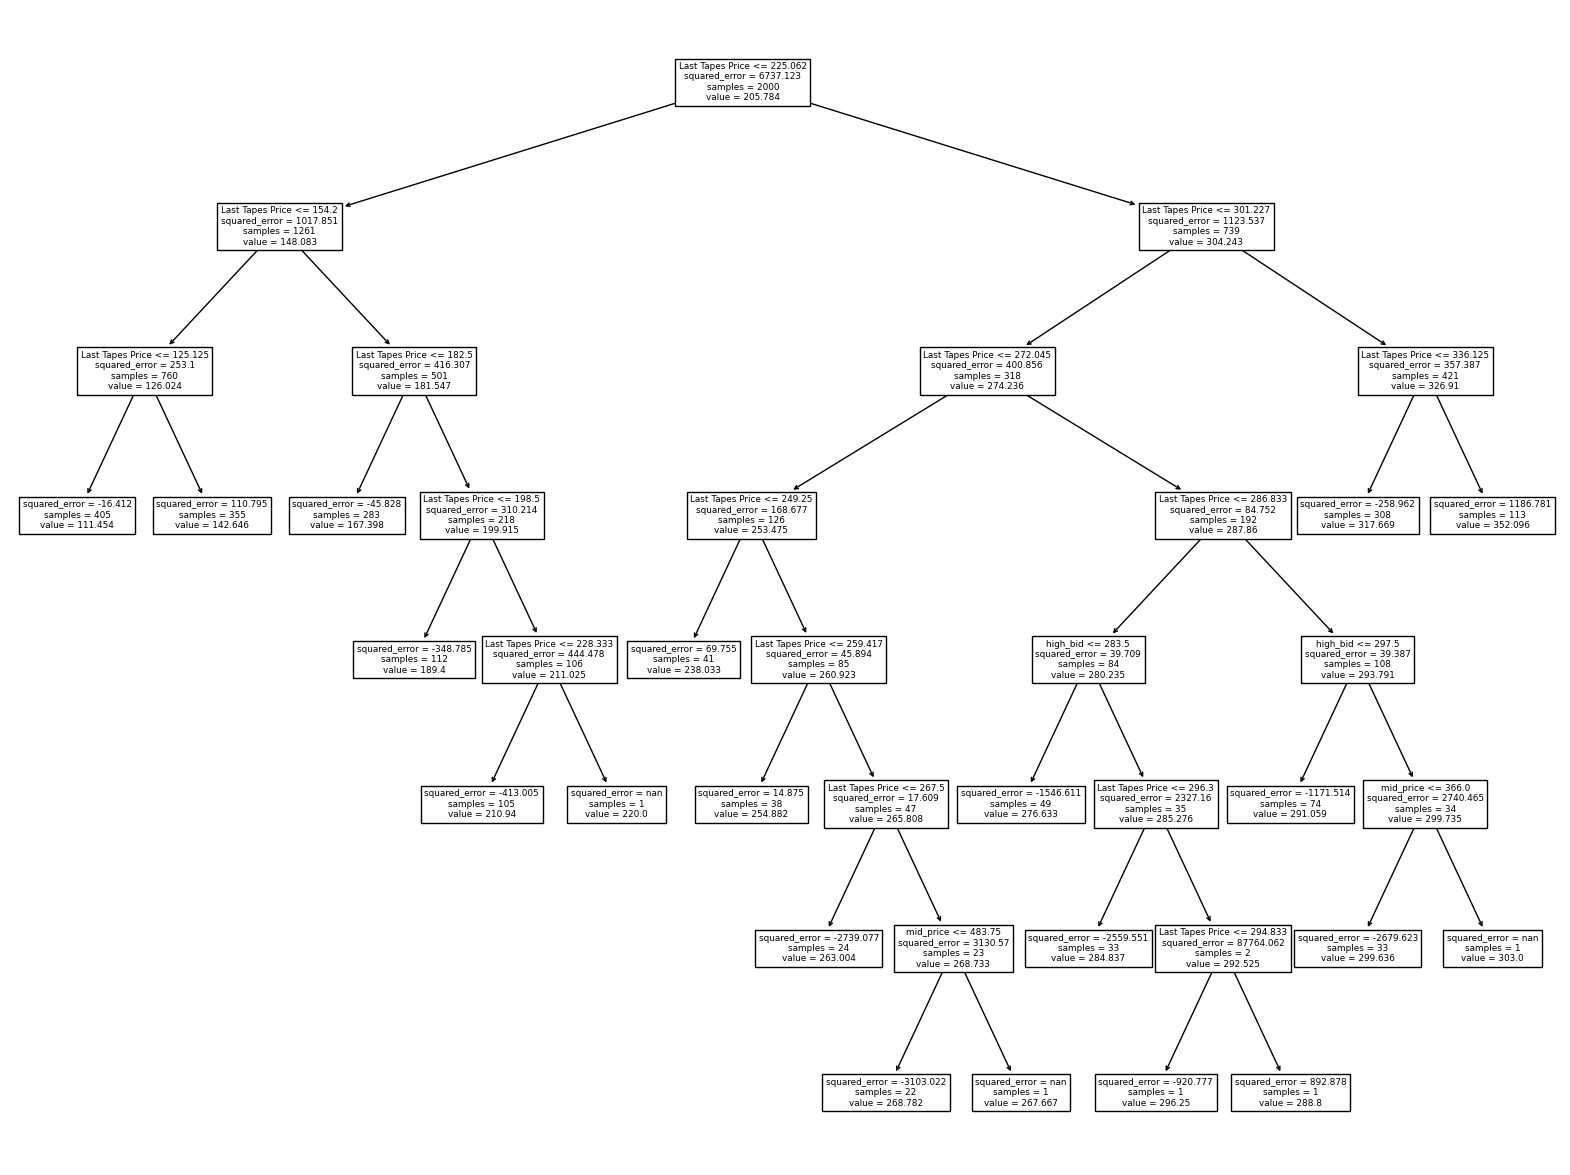

In [45]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(clf, feature_names=x_features*len(X))
plt.show()

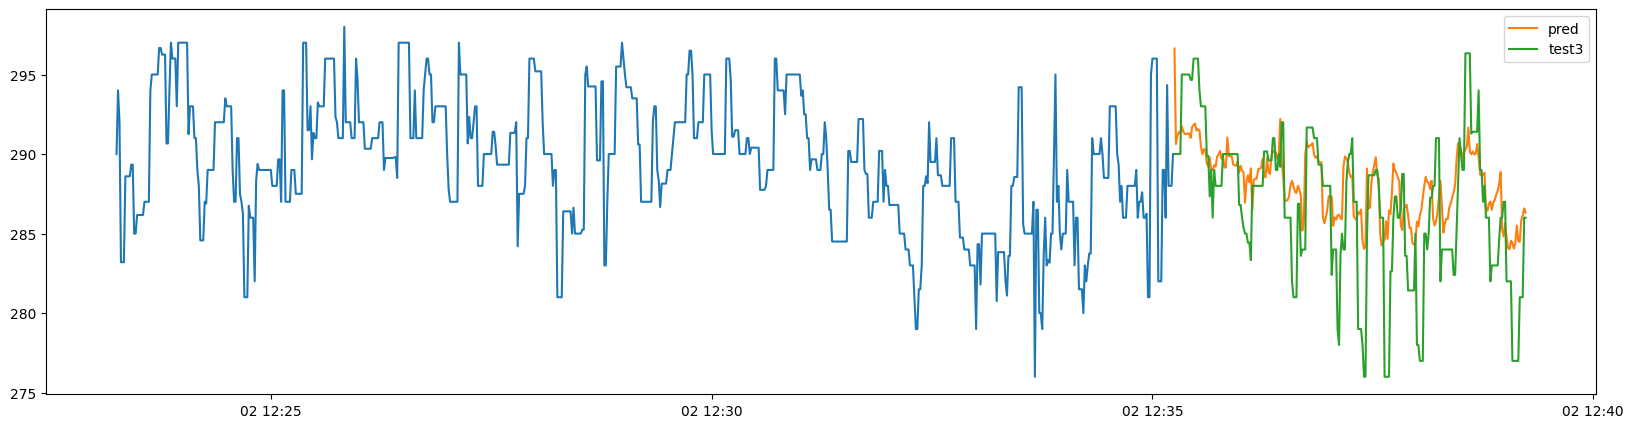

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(y_train)
plt.plot(y_test3.index, clf.predict(X_test3), label = "pred")
plt.plot(y_test3, label = "test3")
plt.legend()
plt.show()

In [7]:
for i, c in enumerate(clf.coef_):
    print(x_features[i], c)

alpha 0.3495097717198769
beta 0.08252419115926962
mid_price -362232380723.076
low_ask 181116190361.58197
high_bid 181116190361.8114
Volume 0.008753297209974462
